In [66]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
import random
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

In [61]:
print(len(X_train))
len(y_train)

7500


7500

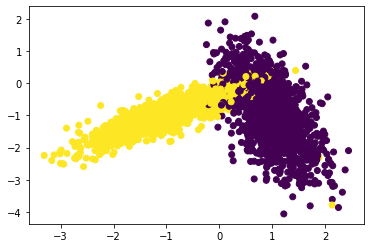

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [162]:
# example cell
fold = 3
lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
chunks = [lst[i:i + len(lst)//fold] for i in range(0, len(lst), len(lst)//fold)]
chunks

[[1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12], [13, 14, 15, 16, 17, 18]]

In [163]:
# example cell
for j in range(3):
    train = []
    test = chunks[j]
    for i in range(3):
        if i != j:
            train.extend(chunks[i])
    print(test, train)

[1, 2, 3, 4, 5, 6] [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[7, 8, 9, 10, 11, 12] [1, 2, 3, 4, 5, 6, 13, 14, 15, 16, 17, 18]
[13, 14, 15, 16, 17, 18] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [168]:
a = [1, 2, 3, 4]
a.extend([8,9])
print(a)
a.extend([10,11])
a

[1, 2, 3, 4, 8, 9]


[1, 2, 3, 4, 8, 9, 10, 11]

### Implementation of Random search CV : custom method

In [173]:
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    
    print(params)
    trainscores = []
    testscores  = []
    
    for k in tqdm(params):
        train_scores_perfold = []
        test_scores_perfold = []
        
        print('k', k)
        # see referene cells below to understand the grouping and train test spit logic
        segment = len(x_train)//folds
        x_chunks = [x_train[i:i + segment] for i in range(0, len(x_train), segment)]
        y_chunks = [y_train[i:i + segment] for i in range(0, len(y_train), segment)]
        print(len(x_chunks), len(y_chunks))
        for i in range(folds):
            X_train = []
            Y_train = []
            X_test = x_chunks[i]
            Y_test = y_chunks[i]
            for j in range(folds):
                if j != i:
                    X_train.extend(x_chunks[j])
                    Y_train.extend(y_chunks[j])
            print('k',k,i,len(X_train), len(X_test))
            print('k',k,i,len(Y_train), len(Y_test))
            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            test_scores_perfold.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            train_scores_perfold.append(accuracy_score(Y_train, Y_predicted)) 
        trainscores.append(np.mean(np.array(train_scores_perfold)))
        testscores.append(np.mean(np.array(test_scores_perfold)))  
            
    return trainscores,testscores

* Reference cell to see how my grouping works, here fold is 3 so i have made chunk of lists called chunks

* In each iteration selecting one chunk as test data and remaining 2 collectively as train data

### Calling the custom random search CV method and plot of 'Hyperparameter VC accuracy'

  0%|          | 0/10 [00:00<?, ?it/s]

[1, 5, 14, 23, 28, 30, 31, 32, 33, 34]
k 1
5 5
k 1 0 6000 1500
k 1 0 6000 1500
k 1 1 6000 1500
k 1 1 6000 1500
k 1 2 6000 1500
k 1 2 6000 1500
k 1 3 6000 1500
k 1 3 6000 1500
k 1 4 6000 1500
k 1 4 6000 1500


 10%|█         | 1/10 [00:01<00:09,  1.09s/it]

k 5
5 5
k 5 0 6000 1500
k 5 0 6000 1500
k 5 1 6000 1500
k 5 1 6000 1500
k 5 2 6000 1500
k 5 2 6000 1500
k 5 3 6000 1500
k 5 3 6000 1500
k 5 4 6000 1500
k 5 4 6000 1500


 20%|██        | 2/10 [00:02<00:09,  1.14s/it]

k 14
5 5
k 14 0 6000 1500
k 14 0 6000 1500
k 14 1 6000 1500
k 14 1 6000 1500
k 14 2 6000 1500
k 14 2 6000 1500
k 14 3 6000 1500
k 14 3 6000 1500
k 14 4 6000 1500
k 14 4 6000 1500


 30%|███       | 3/10 [00:03<00:08,  1.19s/it]

k 23
5 5
k 23 0 6000 1500
k 23 0 6000 1500
k 23 1 6000 1500
k 23 1 6000 1500
k 23 2 6000 1500
k 23 2 6000 1500
k 23 3 6000 1500
k 23 3 6000 1500
k 23 4 6000 1500
k 23 4 6000 1500


 40%|████      | 4/10 [00:04<00:07,  1.25s/it]

k 28
5 5
k 28 0 6000 1500
k 28 0 6000 1500
k 28 1 6000 1500
k 28 1 6000 1500
k 28 2 6000 1500
k 28 2 6000 1500
k 28 3 6000 1500
k 28 3 6000 1500
k 28 4 6000 1500
k 28 4 6000 1500


 50%|█████     | 5/10 [00:06<00:06,  1.26s/it]

k 30
5 5
k 30 0 6000 1500
k 30 0 6000 1500
k 30 1 6000 1500
k 30 1 6000 1500
k 30 2 6000 1500
k 30 2 6000 1500
k 30 3 6000 1500
k 30 3 6000 1500
k 30 4 6000 1500
k 30 4 6000 1500


 60%|██████    | 6/10 [00:07<00:05,  1.26s/it]

k 31
5 5
k 31 0 6000 1500
k 31 0 6000 1500
k 31 1 6000 1500
k 31 1 6000 1500
k 31 2 6000 1500
k 31 2 6000 1500
k 31 3 6000 1500
k 31 3 6000 1500
k 31 4 6000 1500
k 31 4 6000 1500


 70%|███████   | 7/10 [00:08<00:03,  1.25s/it]

k 32
5 5
k 32 0 6000 1500
k 32 0 6000 1500
k 32 1 6000 1500
k 32 1 6000 1500
k 32 2 6000 1500
k 32 2 6000 1500
k 32 3 6000 1500
k 32 3 6000 1500
k 32 4 6000 1500
k 32 4 6000 1500


 80%|████████  | 8/10 [00:09<00:02,  1.27s/it]

k 33
5 5
k 33 0 6000 1500
k 33 0 6000 1500
k 33 1 6000 1500
k 33 1 6000 1500
k 33 2 6000 1500
k 33 2 6000 1500
k 33 3 6000 1500
k 33 3 6000 1500
k 33 4 6000 1500
k 33 4 6000 1500


 90%|█████████ | 9/10 [00:11<00:01,  1.30s/it]

k 34
5 5
k 34 0 6000 1500
k 34 0 6000 1500
k 34 1 6000 1500
k 34 1 6000 1500
k 34 2 6000 1500
k 34 2 6000 1500
k 34 3 6000 1500
k 34 3 6000 1500
k 34 4 6000 1500
k 34 4 6000 1500


100%|██████████| 10/10 [00:12<00:00,  1.27s/it]


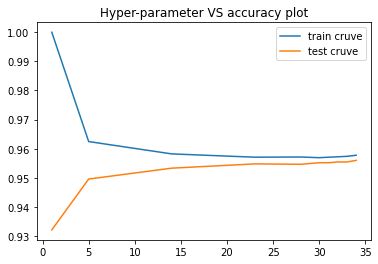

In [175]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()
param_range = range(1,35)
params = random.sample(param_range, 10)
params = sorted(params)
folds = 5

trainscores, testscores = RandomSearchCV(X_train,y_train, neigh, params, folds)
 

plt.plot(params,trainscores, label='train cruve')
plt.plot(params,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [146]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

* Choosing best k value as 33 from above plot and hence decision boundary on that k

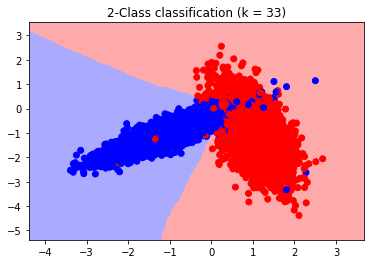

In [147]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 33)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)